# Data

The dataset that we will be using will come from several different places; three datasets will come from Twitter and display 11.6 million music listening events of 139K users and 346K tracks. Another dataset will come from Spotify and will cover 125 different genres. Information from these datsets will include both user information such as which users listened to which tracks but also information related to similarity metrics such as danceability and loudness.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#creating dataframes from CSVs regarding information from Twitter
#we will display statistical information for all the quantitative variables that we pull to gain a holistic understanding of the datasets
#we will also display information related to the null variables in each column

#only pulling columns 0 to 22 for cont_df as the remaining columns need more investigation
cont_df = pd.read_csv('context_content_features.csv', usecols=range(0, 22))
sent_df = pd.read_csv('sentiment_values.csv', index_col = False)
utht_df = pd.read_csv('user_track_hashtag_timestamp.csv')

C:\Users\fbmd1067\AppData\Local\Temp\ipykernel_8080\3782684915.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  sent_df = pd.read_csv('sentiment_values.csv', index_col = False)


In [3]:
print('cont_df shape:', cont_df.shape) 
print('sent_df shape:', sent_df.shape) 
print('utht_df shape:', utht_df.shape) 


cont_df shape: (11614671, 22)
sent_df shape: (5290, 17)
utht_df shape: (17560113, 4)


# Context_Content_Features

In [3]:
cont_df.head()

coordinates  instrumentalness  liveness  speechiness  danceability  valence  \
0         NaN          0.004790    0.1800       0.0294         0.634    0.342   
1         NaN          0.017700    0.0638       0.0624         0.769    0.752   
2         NaN          0.000000    0.0860       0.0436         0.675    0.775   
3         NaN          0.000000    0.1430       0.0292         0.324    0.333   
4         NaN          0.000183    0.3620       0.0524         0.767    0.808   

   loudness    tempo  acousticness  energy  ...  \
0    -8.345  125.044       0.00035   0.697  ...   
1    -8.252   95.862       0.26700   0.826  ...   
2    -4.432   97.030       0.21700   0.885  ...   
3    -5.647   74.101       0.23900   0.574  ...   
4    -5.011  114.237       0.03640   0.739  ...   

                          artist_id  place  geo tweet_lang  \
0  b2980c722a1ace7a30303718ce5491d8    NaN  NaN         en   
1  5cddcd0e314e2f2223ab21937d2c8778    NaN  NaN         en   
2  e41273f43af504714d85465294f1f369    NaN  NaN         en   
3  557ce373bd29743eb00a3723ab19ebe8    NaN  NaN         en   
4  77bd64b4bf77e10001fd02964985ae0f    NaN  NaN         en   

                           track_id           created_at lang  \
0  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
1  da3110a77b724072b08f231c9d6f7534  2014-01-01 05:54:22   en   
2  ba84d88c10fb0e42d4754a27ead10546  2014-01-01 05:54:22   es   
3  33f95122281f76e7134f9cbea3be980f  2014-01-01 05:54:24   en   
4  b5c42e81e15cd54b9b0ee34711dedf05  2014-01-01 05:54:24   en   

                     time_zone       user_id                  id  
0   Central Time (US & Canada)  8.149694e+07  418243774842929150  
1                          NaN  2.205687e+09  418243779137896450  
2  Mountain Time (US & Canada)  1.325884e+08  418243779951198200  
3   Eastern Time (US & Canada)  9.767522e+07  418243788004687900  
4   Central Time (US & Canada)  1.794569e+07  418243789753700350  

[5 rows x 22 columns]

In [4]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614671 entries, 0 to 11614670
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   coordinates       object 
 1   instrumentalness  float64
 2   liveness          float64
 3   speechiness       float64
 4   danceability      float64
 5   valence           float64
 6   loudness          float64
 7   tempo             float64
 8   acousticness      float64
 9   energy            float64
 10  mode              float64
 11  key               float64
 12  artist_id         object 
 13  place             object 
 14  geo               object 
 15  tweet_lang        object 
 16  track_id          object 
 17  created_at        object 
 18  lang              object 
 19  time_zone         object 
 20  user_id           float64
 21  id                int64  
dtypes: float64(12), int64(1), object(9)
memory usage: 1.9+ GB


In [11]:
cont_df.describe().T

count          mean           std          min  \
instrumentalness  11611869.0  9.644051e-02  2.386454e-01      0.00000   
liveness          11611757.0  1.914839e-01  1.597695e-01      0.00673   
speechiness       11610783.0  6.556934e-02  6.499443e-02      0.02160   
danceability      11610783.0  5.579694e-01  1.580563e-01      0.03710   
valence           11609883.0  5.165480e-01  2.478292e-01      0.00001   
loudness          11614671.0 -7.687357e+00  3.846243e+00    -60.00000   
tempo             11614671.0  1.228318e+02  2.830076e+01      0.00000   
acousticness      11611884.0  2.085219e-01  2.690199e-01      0.00000   
energy            11611910.0  6.815607e-01  2.150572e-01      0.00002   
mode              11611957.0  6.738325e-01  4.688094e-01      0.00000   
key               11611957.0  5.295308e+00  3.558110e+00      0.00000   
user_id           11570327.0  9.080898e+08  8.830152e+08    939.00000   
id                11614671.0  4.893328e+17  4.577196e+16  10440.00000   

                           25%           50%           75%           max  
instrumentalness  0.000000e+00  5.560000e-05  1.050000e-02  9.990000e-01  
liveness          9.280000e-02  1.280000e-01  2.490000e-01  1.000000e+00  
speechiness       3.310000e-02  4.280000e-02  6.740000e-02  9.650000e-01  
danceability      4.540000e-01  5.640000e-01  6.720000e-01  9.920000e-01  
valence           3.200000e-01  5.130000e-01  7.200000e-01  1.000000e+00  
loudness         -9.643000e+00 -6.815000e+00 -4.968000e+00  3.651000e+00  
tempo             1.013660e+02  1.213080e+02  1.399200e+02  2.459410e+02  
acousticness      8.210000e-03  7.540000e-02  3.210000e-01  9.960000e-01  
energy            5.410000e-01  7.200000e-01  8.550000e-01  1.000000e+00  
mode              0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
key               2.000000e+00  5.000000e+00  9.000000e+00  1.100000e+01  
user_id           1.505856e+08  5.314516e+08  1.591214e+09  2.937225e+09  
id                4.650887e+17  4.927301e+17  5.201160e+17  5.472757e+17

In [6]:
cont_df.describe(include=[object]).T

count   unique  \
coordinates     38058     9811   
artist_id    11614671    44213   
place           44344     3681   
geo             38058     9811   
tweet_lang   11614671       46   
track_id     11614671   346700   
created_at   11614671  9085111   
lang         11614607       88   
time_zone     8353946      204   

                                                           top      freq  
coordinates  {u'type': u'Point', u'coordinates': [13.119993...     14328  
artist_id                     9fef94eece5aa762753f0beef2508bde     60560  
place        {u'name': u'Potsdam', u'url': u'https://api.tw...      5731  
geo          {u'type': u'Point', u'coordinates': [52.381905...     14328  
tweet_lang                                                  en  10407599  
track_id                      3d02f9fcad37e6bb227682761039498c     31048  
created_at                                                  en       201  
lang                                                        en   8812468  
time_zone                           Eastern Time (US & Canada)   2169410

In [7]:
# NaN values

cont_isna = cont_df.isna().sum().sort_values(ascending=False)/len(cont_df)
print('col_count:',cont_isna.count())

df_data = pd.DataFrame([cont_isna])
df_data.T[0:]

col_count: 22


0
coordinates       0.996723
geo               0.996723
place             0.996182
time_zone         0.280742
user_id           0.003818
valence           0.000412
speechiness       0.000335
danceability      0.000335
liveness          0.000251
instrumentalness  0.000241
acousticness      0.000240
energy            0.000238
key               0.000234
mode              0.000234
lang              0.000006
artist_id         0.000000
tweet_lang        0.000000
track_id          0.000000
created_at        0.000000
tempo             0.000000
loudness          0.000000
id                0.000000

# Drop columns with most NaN

In [8]:
cont_df.drop(['coordinates', 'geo', 'place'], axis=1, inplace=True)

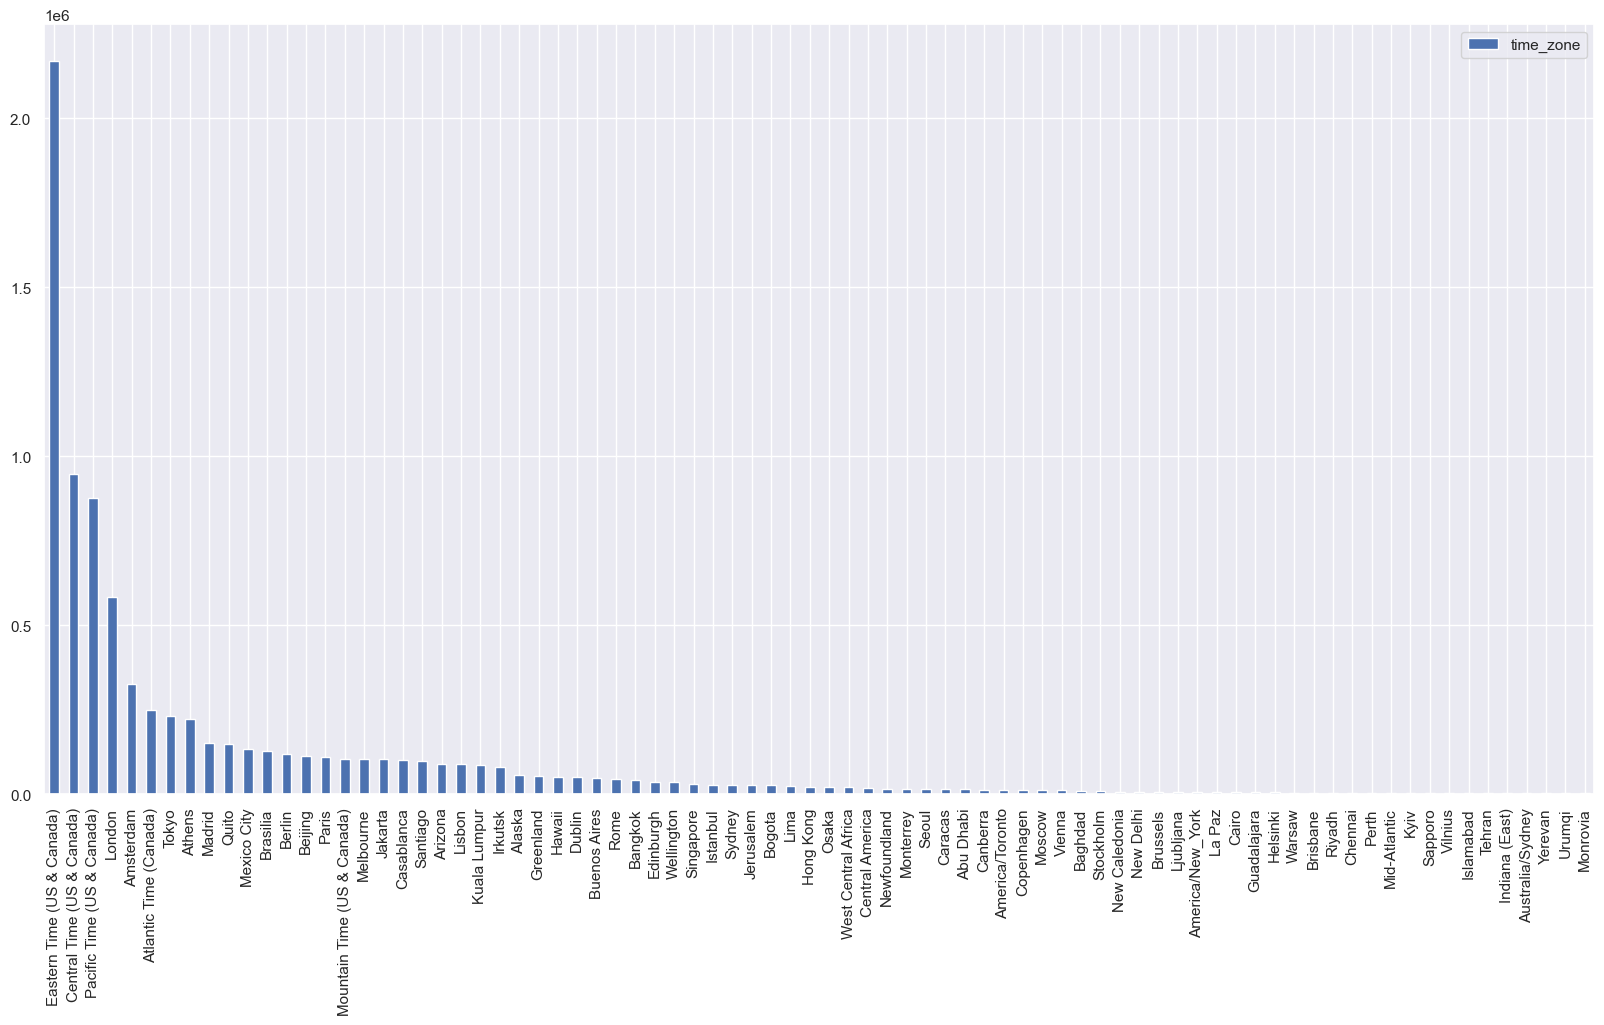

In [9]:
# Most relevant Time zones

pd.DataFrame(cont_df['time_zone'].value_counts().nlargest(80)).plot(kind = 'bar', figsize=(20,10));

In [10]:
pd.DataFrame(cont_df['time_zone'].value_counts().nlargest(40))
#https://www.timeanddate.com/time/map/#!cities=232,64,75,179,137,103,136,16,248,26,141,37,190,155,45,33,
# 195,152,108,60,133,122,378,703,78,51,215,28,304,264,236,107,240,110,41,131,102

time_zone
Eastern Time (US & Canada)     2169410
Central Time (US & Canada)      948484
Pacific Time (US & Canada)      877072
London                          582527
Amsterdam                       326366
Atlantic Time (Canada)          247924
Tokyo                           230261
Athens                          223008
Madrid                          151714
Quito                           148122
Mexico City                     133029
Brasilia                        126885
Berlin                          118135
Beijing                         113341
Paris                           109214
Mountain Time (US & Canada)     105364
Melbourne                       103989
Jakarta                         102640
Casablanca                      101844
Santiago                         98545
Arizona                          90464
Lisbon                           89621
Kuala Lumpur                     86840
Irkutsk                          80656
Alaska                           55521
Greenland                        54660
Hawaii                           51496
Dublin                           51359
Buenos Aires                     46788
Rome                             45186
Bangkok                          42950
Edinburgh                        36179
Wellington                       36057
Singapore                        30108
Istanbul                         28463
Sydney                           27805
Jerusalem                        27633
Bogota                           26401
Lima                             23273
Hong Kong                        22702

In [11]:
cont_df['time_zone'].value_counts()[cont_df['time_zone'].value_counts() < 50000][0:100]

Buenos Aires    46788
Rome            45186
Bangkok         42950
Edinburgh       36179
Wellington      36057
                ...  
Bratislava        253
Yakutsk           253
Tashkent          197
Georgetown        175
Dhaka             173
Name: time_zone, Length: 100, dtype: int64

In [12]:
cont_df.time_zone.unique()

array(['Central Time (US & Canada)', nan, 'Mountain Time (US & Canada)',
       'Eastern Time (US & Canada)', 'Quito', 'London', 'Madrid',
       'Pacific Time (US & Canada)', 'Atlantic Time (Canada)',
       'Edinburgh', 'Athens', 'Paris', 'Amsterdam', 'Tokyo', 'Arizona',
       'Melbourne', 'Indiana (East)', 'Mid-Atlantic', 'Berlin', 'Jakarta',
       'Moscow', 'Beijing', 'Greenland', 'Mexico City', 'Brasilia',
       'Bogota', 'Sydney', 'Lisbon', 'Casablanca', 'Kuala Lumpur',
       'Vilnius', 'Alaska', 'Tijuana', 'Singapore', 'Bangkok', 'Hawaii',
       'Irkutsk', 'Buenos Aires', 'Canberra', 'La Paz', 'Seoul',
       'Tbilisi', 'Santiago', 'Lima', 'Osaka', 'Kuwait', 'Rome', 'Riyadh',
       'Caracas', 'Budapest', 'Taipei', 'Brisbane', 'Sapporo',
       'Wellington', 'Brussels', 'Islamabad', 'Chennai', 'Hong Kong',
       'Nairobi', 'Istanbul', 'Tehran', 'New Delhi', 'Kathmandu',
       'Dublin', 'Bucharest', 'Auckland', 'Stockholm', 'Jerusalem',
       'Warsaw', 'Helsinki', 'Mumbai

# Times Zones

In [13]:
#Rename the values

cont_df['time_zone'].replace('Central Time (US & Canada)', 'UTC -6',inplace=True)
cont_df['time_zone'].replace('Mountain Time (US & Canada)', 'UTC -7',inplace=True)
cont_df['time_zone'].replace('Eastern Time (US & Canada)', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('Pacific Time (US & Canada)', 'UTC -8',inplace=True)
cont_df['time_zone'].replace('Atlantic Time (Canada)', 'UTC -4',inplace=True)
cont_df['time_zone'].replace('Arizona', 'UTC -7',inplace=True)
cont_df['time_zone'].replace('Alaska', 'UTC -9',inplace=True)
cont_df['time_zone'].replace('Hawaii', 'UTC -10',inplace=True)
cont_df['time_zone'].replace('Pacific/Honolulu', 'UTC -10',inplace=True)
cont_df['time_zone'].replace('America/Denver', 'UTC -7',inplace=True)
cont_df['time_zone'].replace('America/Los_Angeles', 'UTC -8',inplace=True)
cont_df['time_zone'].replace('America/Chicago', 'UTC -6',inplace=True)
cont_df['time_zone'].replace('America/New_York', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('America/Halifax', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('America/Detroit', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('America/Dawson', 'UTC -7',inplace=True)
cont_df['time_zone'].replace('America/Phoenix', 'UTC -7',inplace=True)
cont_df['time_zone'].replace('London', 'UTC +0',inplace=True)
cont_df['time_zone'].replace('Amsterdam', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Tokyo', 'UTC +9',inplace=True)
cont_df['time_zone'].replace('Athens', 'UTC +2',inplace=True)
cont_df['time_zone'].replace('Madrid', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Quito', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('Mexico City', 'UTC -6',inplace=True)
cont_df['time_zone'].replace('Brasilia', 'UTC -3',inplace=True)
cont_df['time_zone'].replace('Berlin', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Beijing', 'UTC +8',inplace=True)
cont_df['time_zone'].replace('Paris', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Melbourne', 'UTC +10',inplace=True)
cont_df['time_zone'].replace('Jakarta', 'UTC +7',inplace=True)
cont_df['time_zone'].replace('Casablanca', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Santiago', 'UTC -4',inplace=True)
cont_df['time_zone'].replace('Lisbon', 'UTC +0',inplace=True)
cont_df['time_zone'].replace('Kuala Lumpur', 'UTC +8',inplace=True)
cont_df['time_zone'].replace('Irkutsk', 'UTC +8',inplace=True)
cont_df['time_zone'].replace('Greenland', 'UTC -2',inplace=True)
cont_df['time_zone'].replace('Dublin', 'UTC +0',inplace=True)
cont_df['time_zone'].replace('Buenos Aires', 'UTC -3',inplace=True)
cont_df['time_zone'].replace('Rome', 'UTC +1',inplace=True)
cont_df['time_zone'].replace('Bangkok', 'UTC +7',inplace=True)
cont_df['time_zone'].replace('Edinburgh', 'UTC +0',inplace=True)
cont_df['time_zone'].replace('Wellington', 'UTC +13',inplace=True)
cont_df['time_zone'].replace('Singapore', 'UTC +8',inplace=True)
cont_df['time_zone'].replace('Istanbul', 'UTC +3',inplace=True)
cont_df['time_zone'].replace('Sydney', 'UTC +11',inplace=True)
cont_df['time_zone'].replace('Jerusalem', 'UTC +2',inplace=True)
cont_df['time_zone'].replace('Bogota', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('Lima', 'UTC -5',inplace=True)
cont_df['time_zone'].replace('Hong Kong', 'UTC +8',inplace=True)

In [14]:
# Drop indirectly some values

cont_df = cont_df.loc[~((cont_df['time_zone'] != 'UTC -10') &
                       (cont_df['time_zone'] != 'UTC -9') &
                        (cont_df['time_zone'] != 'UTC -8') &
                        (cont_df['time_zone'] != 'UTC -7') &
                        (cont_df['time_zone'] != 'UTC -6') &
                        (cont_df['time_zone'] != 'UTC -5') &
                        (cont_df['time_zone'] != 'UTC -4') &
                        (cont_df['time_zone'] != 'UTC -3') &
                        (cont_df['time_zone'] != 'UTC -2') &
                        (cont_df['time_zone'] != 'UTC +0') &
                        (cont_df['time_zone'] != 'UTC +1') &
                        (cont_df['time_zone'] != 'UTC +2') &
                        (cont_df['time_zone'] != 'UTC +3') &
                        (cont_df['time_zone'] != 'UTC +8') &
                        (cont_df['time_zone'] != 'UTC +9') &
                        (cont_df['time_zone'] != 'UTC +10') &
                        (cont_df['time_zone'] != 'UTC +11') &
                        (cont_df['time_zone'] != 'UTC +13')),:]

In [15]:
cont_df.shape

(7835024, 19)

In [ ]:
# Replace values for time zones
# https://www.timeanddate.com/time/zones/cst

In [16]:
#Different time zones in dataset
a = cont_df['time_zone'].value_counts(normalize=True).to_frame()                #.index
a[150:205]

Empty DataFrame
Columns: [time_zone]
Index: []

In [17]:
#Different languages in dataset

cont_df['lang'].value_counts().index

#cont_df[cont_df['lang'] == 'West Central Africa']

# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes
# all other languages could be erased?

Index(['en', 'es', 'ja', 'pt', 'en-gb', 'nl', 'fr', 'de', 'it', 'tr', 'ca',
       'id', 'el', 'gl', 'sv', 'xx-lc', 'ko', 'ru', 'ar', 'pl', 'no', 'eu',
       'fi', 'zh-cn', 'zh-tw', 'hu', 'da', 'msa', 'fil', 'fa', 'ro', 'cs',
       'th', 'he'],
      dtype='object')

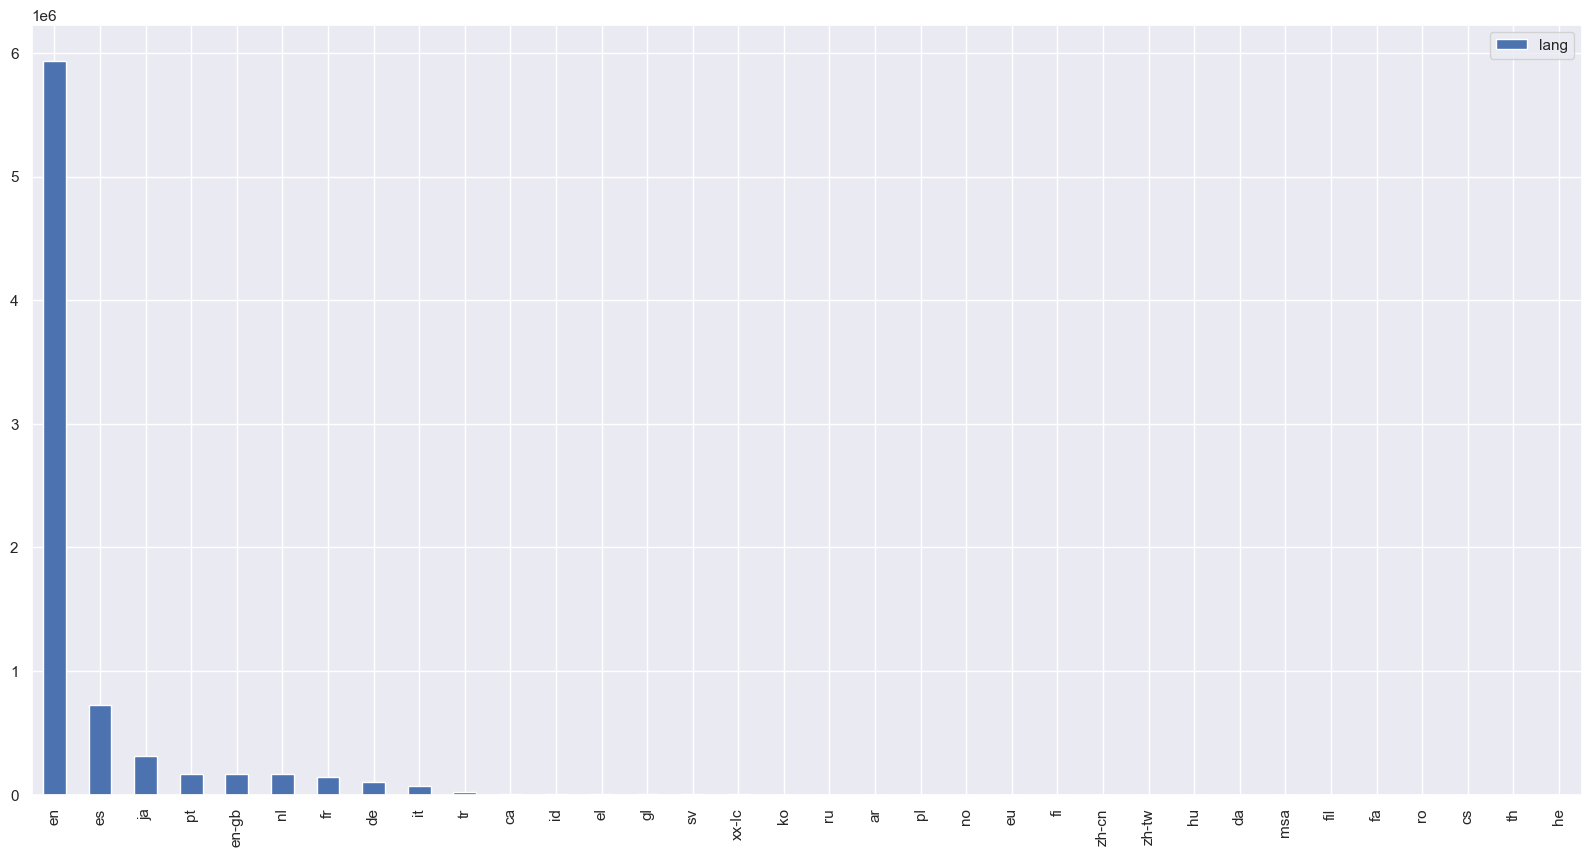

In [18]:
# Most relevant languages in the dataset

pd.DataFrame(cont_df['lang'].value_counts().nlargest(40)).plot(kind = 'bar', figsize=(20,10));

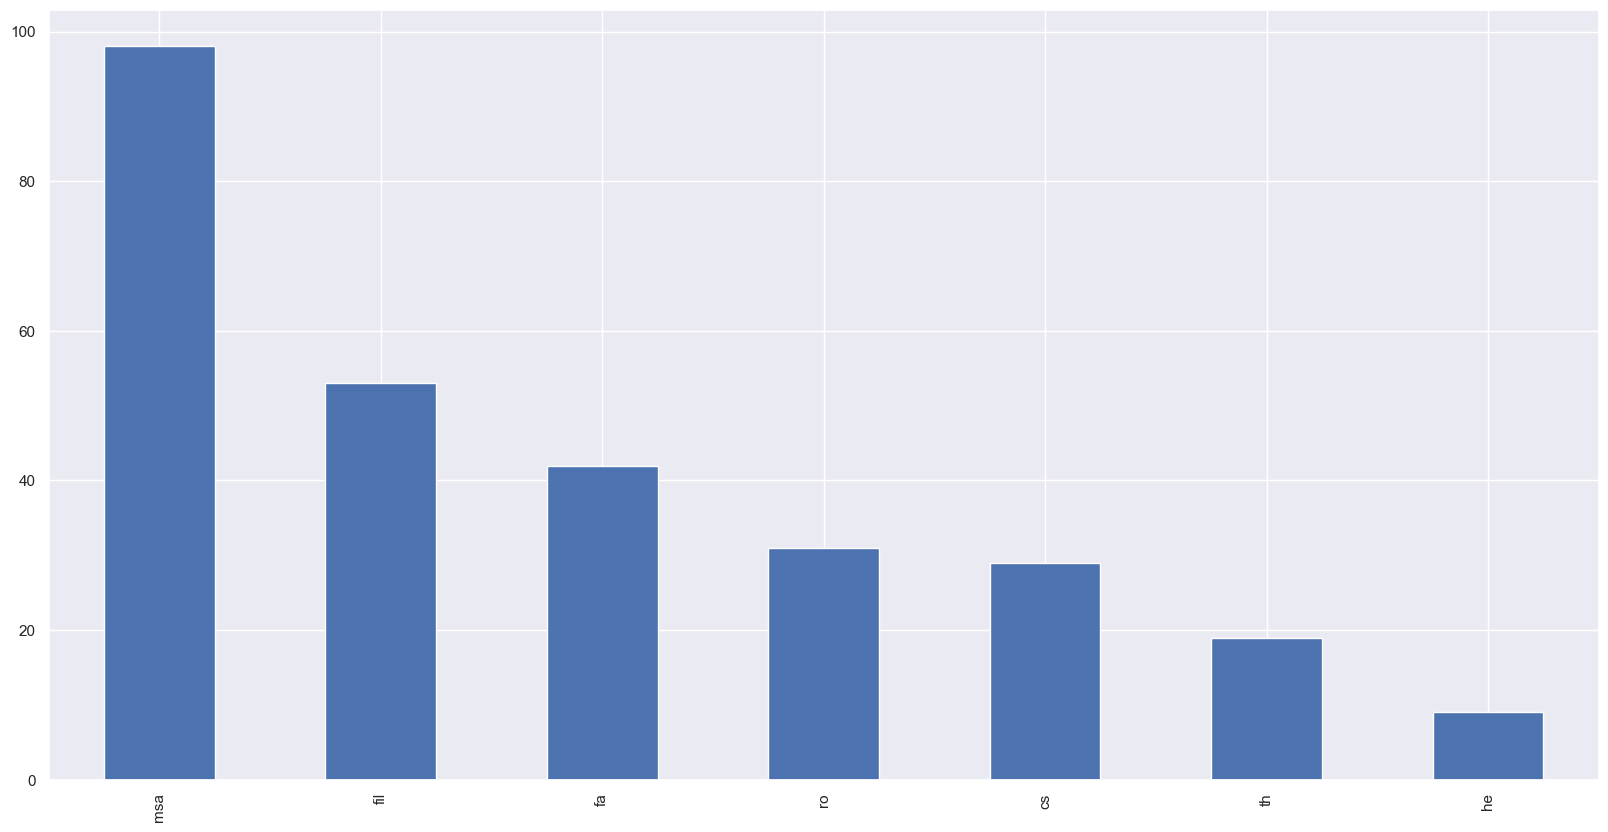

In [19]:
# Most irrelevant languages in the dataset

cont_df['lang'].value_counts()[cont_df['lang'].value_counts() < 100].plot(kind = 'bar', figsize=(20,10));

In [20]:
# Tweet languages

cont_df['tweet_lang'].value_counts().index

Index(['en', 'es', 'et', 'de', 'in', 'ja', 'it', 'sk', 'fr', 'ht', 'pt', 'tl',
       'pl', 'nl', 'cy', 'no', 'ro', 'da', 'fi', 'id', 'sv', 'sl', 'tr', 'zh',
       'bs', 'hu', 'lt', 'is', 'vi', 'hr', 'lv', 'ko', 'ru', 'und', 'el', 'bg',
       'fa', 'uk', 'th', 'ar', 'iw', 'he', 'ka'],
      dtype='object')

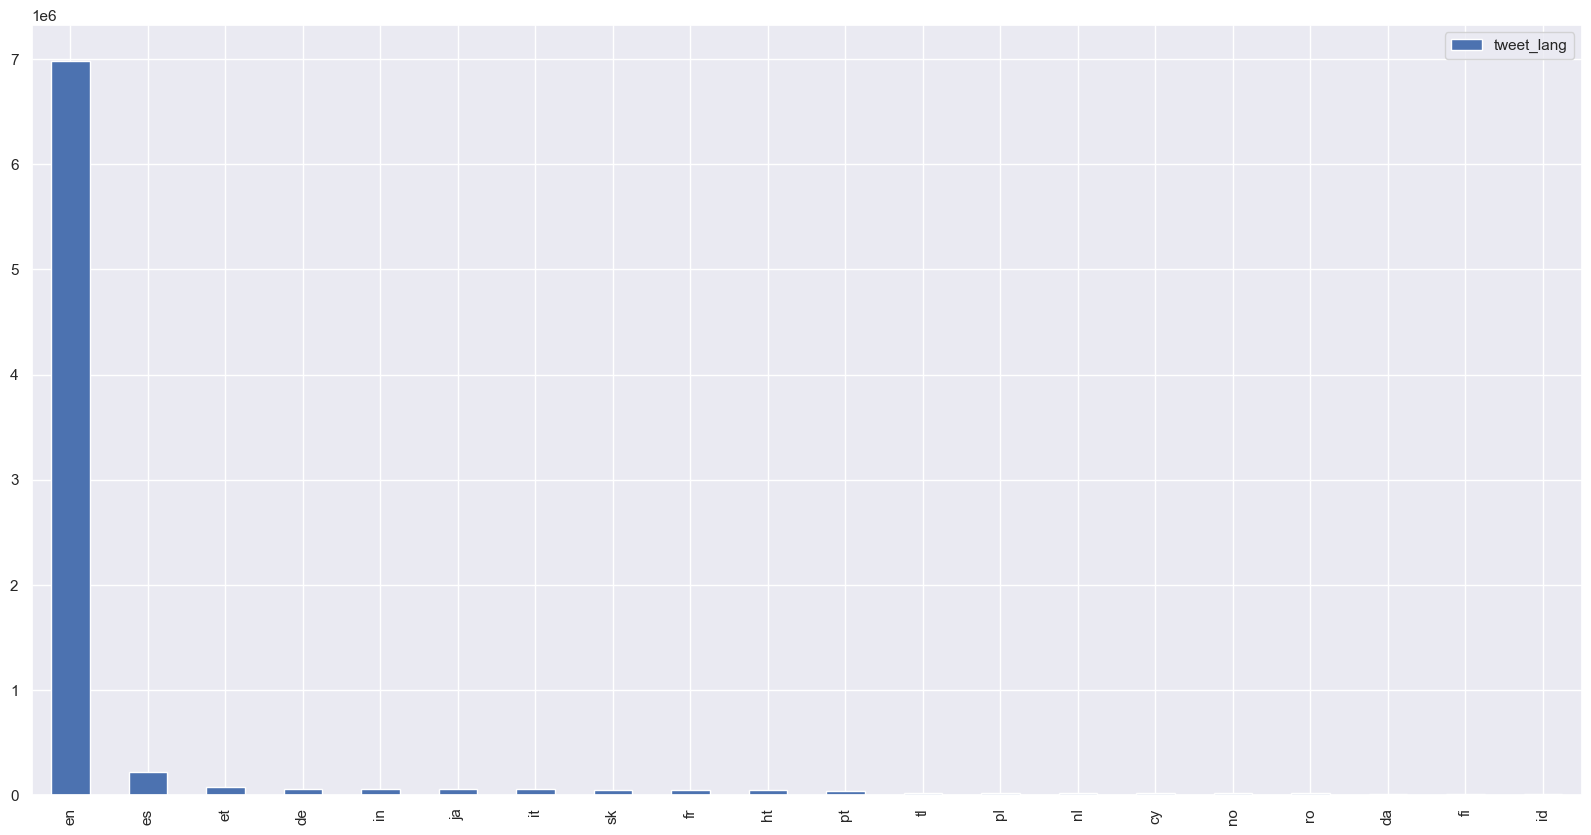

In [21]:
# Most relevant Tweet languages

pd.DataFrame(cont_df['tweet_lang'].value_counts().nlargest(20)).plot(kind = 'bar', figsize=(20,10));

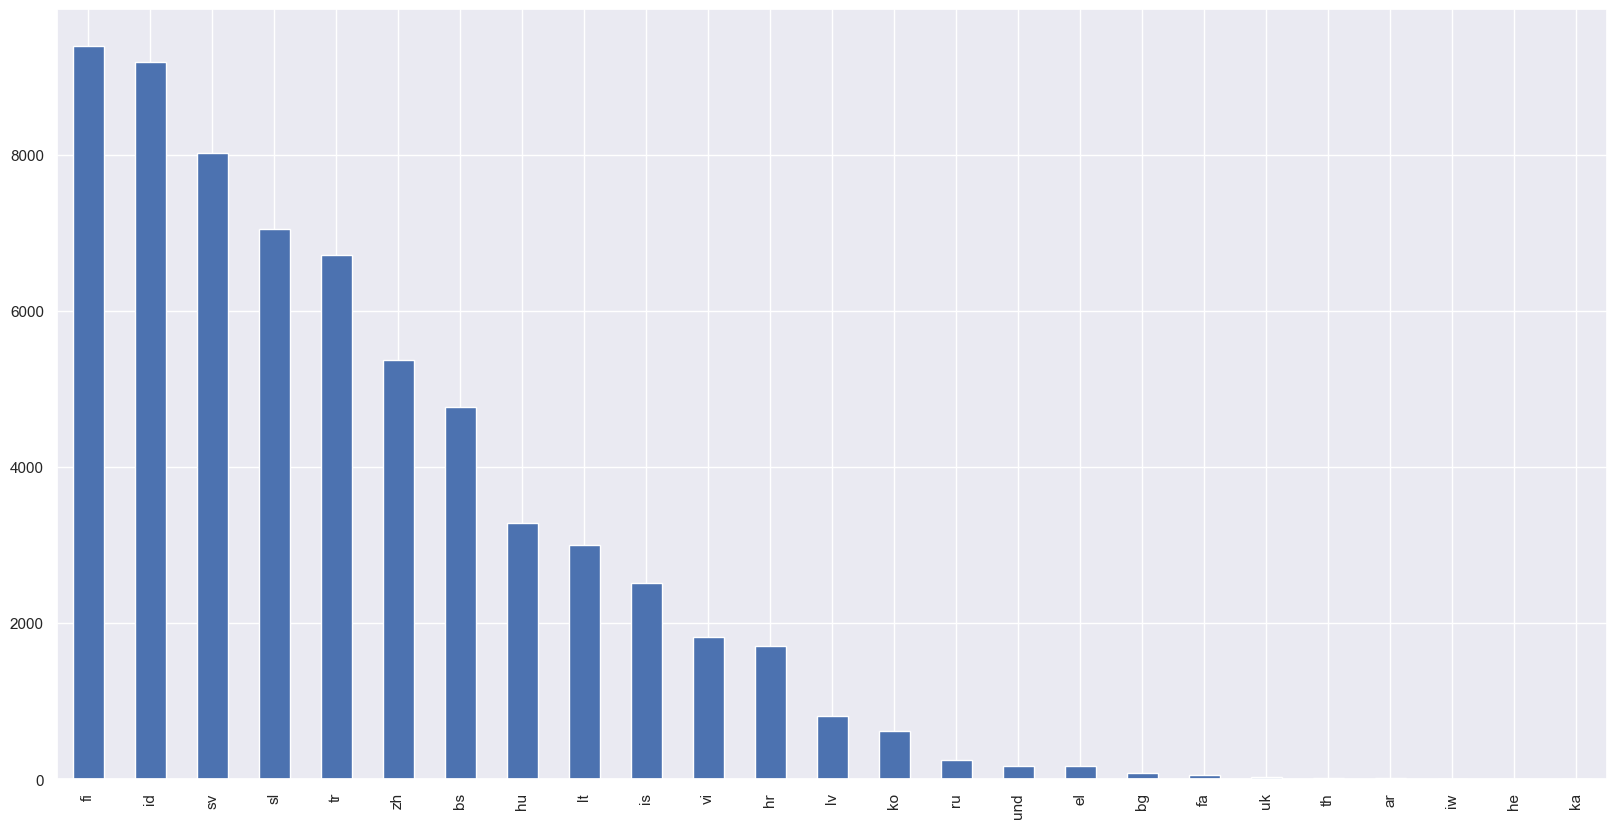

In [22]:
# Most irrelevant tweet languages

cont_df['tweet_lang'].value_counts()[cont_df['tweet_lang'].value_counts() < 10000].plot(kind = 'bar', figsize=(20,10));

In [23]:
for l in cont_df.tweet_lang.unique():
    print(f"{l}")
    print(f"{cont_df[cont_df.tweet_lang == l].lang.value_counts(normalize=True)}")
    print('==========================================')


en
en       0.781038
es       0.076789
ja       0.035134
en-gb    0.021934
nl       0.021233
pt       0.021001
fr       0.018039
de       0.011856
it       0.008128
tr       0.001975
ca       0.000508
el       0.000501
id       0.000415
gl       0.000278
sv       0.000245
xx-lc    0.000194
ko       0.000140
ar       0.000120
ru       0.000105
pl       0.000098
no       0.000070
eu       0.000044
fi       0.000036
zh-cn    0.000031
zh-tw    0.000020
hu       0.000019
msa      0.000013
da       0.000012
fil      0.000007
fa       0.000006
cs       0.000004
ro       0.000004
th       0.000002
he       0.000001
Name: lang, dtype: float64
et
en       0.734145
es       0.088225
ja       0.048321
en-gb    0.037826
nl       0.030739
pt       0.021045
fr       0.019347
it       0.009273
de       0.005675
tr       0.002145
id       0.000910
ru       0.000543
ca       0.000353
fi       0.000244
ar       0.000177
ko       0.000177
el       0.000177
sv       0.000177
gl       0.000163
xx-lc    0.00

tr       0.453381
en       0.414507
es       0.044534
en-gb    0.021895
fr       0.015639
ja       0.015192
nl       0.014298
pt       0.009383
de       0.005958
ar       0.002830
it       0.001043
sv       0.000447
ca       0.000447
ko       0.000149
gl       0.000149
da       0.000149
Name: lang, dtype: float64
is
en       0.448687
es       0.218377
ja       0.161893
pt       0.046539
de       0.036595
it       0.035402
fr       0.016309
en-gb    0.012331
tr       0.011933
ko       0.003182
nl       0.001989
gl       0.001591
id       0.001193
ca       0.001193
xx-lc    0.000796
no       0.000796
pl       0.000398
fi       0.000398
el       0.000398
Name: lang, dtype: float64
lv
en       0.713930
es       0.151741
nl       0.063433
de       0.014925
ja       0.013682
xx-lc    0.009950
fr       0.009950
pt       0.007463
en-gb    0.007463
tr       0.002488
it       0.002488
ca       0.002488
Name: lang, dtype: float64
da
en       0.742203
es       0.102299
ja       0.038407
fr       0

Investigating the correlation between tweet_lang and lang from cont_df, we find that these are not the same fields as was initially suspected. We also find that for most values of tweet_lang, a lang value of en is the most dominant. This may give us an indication that there might be some bias in the dataset with regards to Anglophone music. This will need to be investigated.

The lang feature also has cities, dialects, and timezones in it. This will need to be cleaned up before utilizing in a machine learning model.

There are also some bizarre language codes in lang like xx-lc which is apparently the LOLCAT language. Not sure what to do about that one but there is definitely further investigation needed. 

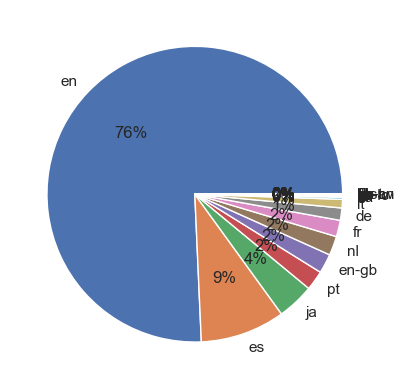

In [24]:
plt.pie(cont_df['lang'].value_counts(), labels = list(cont_df['lang'].value_counts().index),autopct='%.0f%%');

79% of the dataset is English tracks (76% en & 3% en-gb). This is a huge data imbalance and could potentially mean that if ran through a training model, may result in the predictions that are more suited for listeners of English tracks.

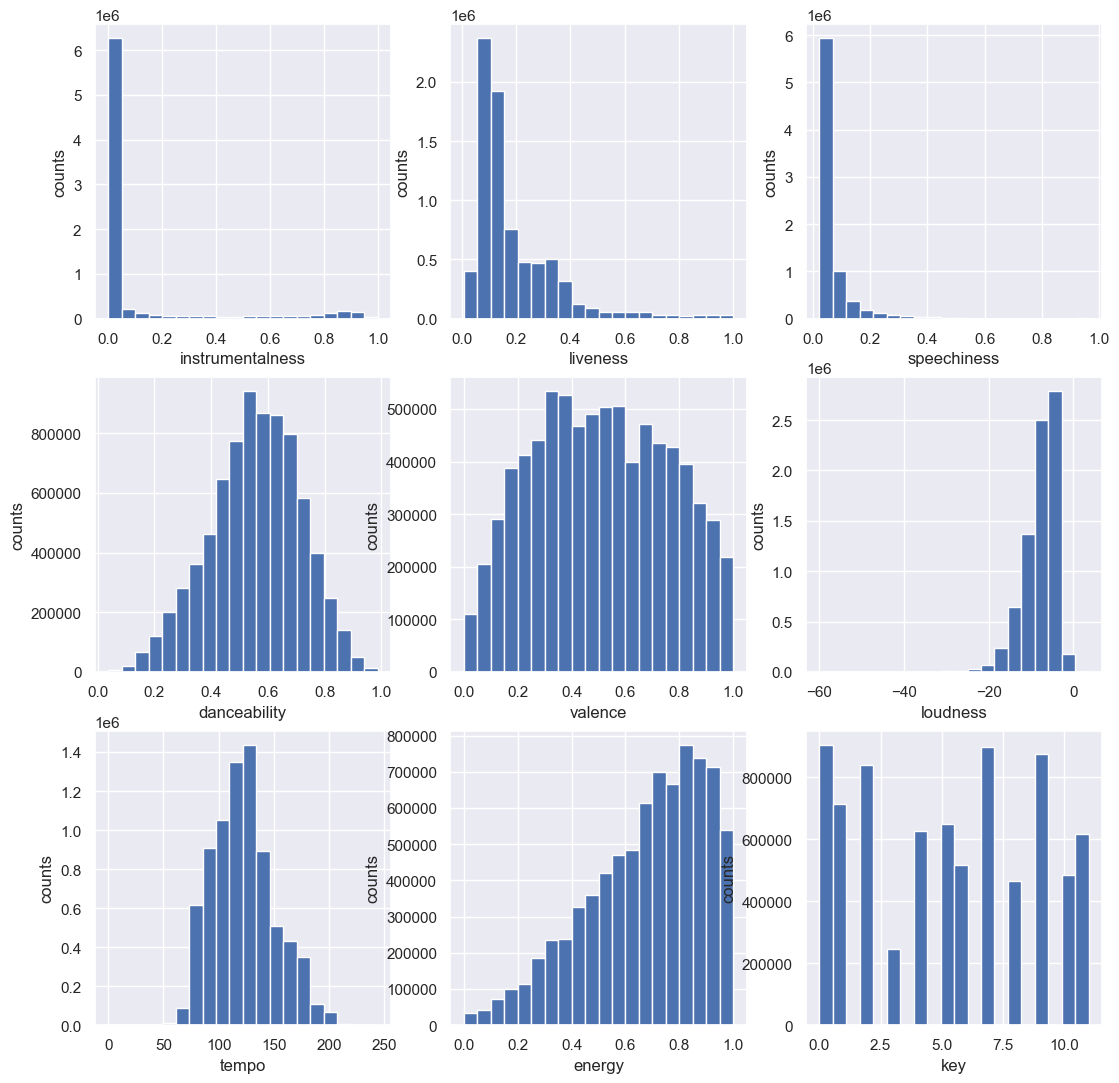

In [25]:
# Features histogram

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

plt.subplot(331)
plt.hist(cont_df['instrumentalness'], bins = 20)  
plt.xlabel('instrumentalness')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(cont_df['liveness'], bins = 20)  
plt.xlabel('liveness')
plt.ylabel('counts')

plt.subplot(333)
plt.hist(cont_df['speechiness'], bins = 20)  
plt.xlabel('speechiness')
plt.ylabel('counts')

plt.subplot(334)
plt.hist(cont_df['danceability'], bins = 20)  
plt.xlabel('danceability')
plt.ylabel('counts')

plt.subplot(335)
plt.hist(cont_df['valence'], bins = 20)  
plt.xlabel('valence')
plt.ylabel('counts')

plt.subplot(336)
plt.hist(cont_df['loudness'], bins = 20)  
plt.xlabel('loudness')
plt.ylabel('counts')

plt.subplot(337)
plt.hist(cont_df['tempo'], bins = 20)  
plt.xlabel('tempo')
plt.ylabel('counts')


plt.subplot(338)
plt.hist(cont_df['energy'], bins = 20)  
plt.xlabel('energy')
plt.ylabel('counts')

plt.subplot(339)
plt.hist(cont_df['key'], bins = 20)  
plt.xlabel('key')
plt.ylabel('counts');
#plt.show()

Text(0, 0.5, 'counts')

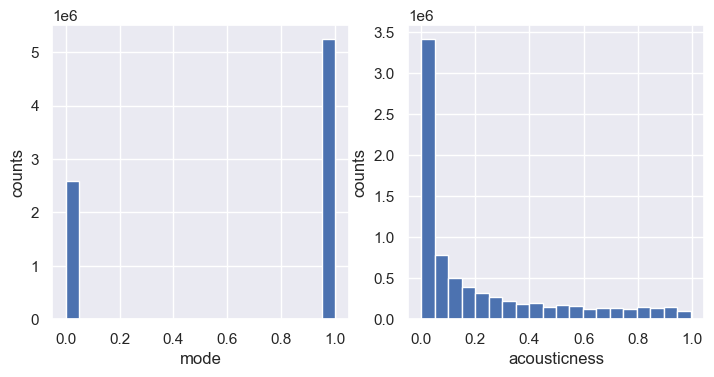

In [26]:
# more features histograms

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

plt.subplot(331)
plt.hist(cont_df['mode'], bins = 20)  
plt.xlabel('mode')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(cont_df['acousticness'], bins = 20)  
plt.xlabel('acousticness')
plt.ylabel('counts')

# Sentiment_Values

In [27]:
sent_df.head()

hashtag   vader_min   vader_max   vader_sum  vader_avg  \
0          relaxtime         0.8         0.8         2.4        0.8   
1  melovechilicheese         0.8         0.8         0.8        0.8   
2         greatmusic         0.8         0.8         2.4        0.8   
3         rockballad         0.7         0.7         0.7        0.7   
4         amonamarth         0.3         0.3         0.3        0.3   

     afinn_min   afinn_max   afinn_sum   afinn_avg   ol_min   ol_max   ol_sum  \
0          NaN         NaN         NaN         NaN   0.7375   0.7375   0.7375   
1          NaN         NaN         NaN         NaN   0.9000   0.9000   0.9000   
2          1.0         1.0         1.0         1.0   0.8875   0.8875   0.8875   
3          NaN         NaN         NaN         NaN      NaN      NaN      NaN   
4          NaN         NaN         NaN         NaN      NaN      NaN      NaN   

    ol_avg   ss_min   ss_max   ss_sum   ss_avg  
0   0.7375      NaN      NaN      NaN      NaN  
1   0.9000      1.0      1.0      1.0      1.0  
2   0.8875      1.0      1.0      1.0      1.0  
3      NaN      NaN      NaN      NaN      NaN  
4      NaN      0.0      0.0      0.0      0.0

In [6]:
sent_df.info()
sent_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      5290 non-null   object 
 1    vader_min   3867 non-null   float64
 2    vader_max   3867 non-null   float64
 3    vader_sum   3867 non-null   float64
 4   vader_avg    3867 non-null   float64
 5     afinn_min  255 non-null    float64
 6    afinn_max   255 non-null    float64
 7    afinn_sum   255 non-null    float64
 8    afinn_avg   255 non-null    float64
 9    ol_min      2635 non-null   float64
 10   ol_max      2635 non-null   float64
 11   ol_sum      2635 non-null   float64
 12   ol_avg      2635 non-null   float64
 13   ss_min      2823 non-null   float64
 14   ss_max      2823 non-null   float64
 15   ss_sum      2823 non-null   float64
 16   ss_avg      2823 non-null   float64
dtypes: float64(16), object(1)
memory usage: 702.7+ KB


Index(['hashtag', ' vader_min', ' vader_max', ' vader_sum', 'vader_avg',
       '  afinn_min', ' afinn_max', ' afinn_sum', ' afinn_avg', ' ol_min',
       ' ol_max', ' ol_sum', ' ol_avg', ' ss_min', ' ss_max', ' ss_sum',
       ' ss_avg'],
      dtype='object')

In [29]:
sent_df.describe().T

count      mean       std     min     25%     50%     75%   max
 vader_min   3867.0  0.495035  0.239754  0.1000  0.3000  0.4000  0.7000  1.00
 vader_max   3867.0  0.513007  0.239695  0.1000  0.3000  0.6000  0.7000  1.00
 vader_sum   3867.0  0.921877  0.629695  0.1000  0.6000  0.7000  1.4000  4.80
vader_avg    3867.0  0.503563  0.236347  0.1000  0.3000  0.6000  0.7000  1.00
  afinn_min   255.0  0.745098  0.436663  0.0000  0.0000  1.0000  1.0000  1.00
 afinn_max    255.0  0.752941  0.432149  0.0000  1.0000  1.0000  1.0000  1.00
 afinn_sum    255.0  0.858824  0.648796  0.0000  1.0000  1.0000  1.0000  3.00
 afinn_avg    255.0  0.749020  0.432158  0.0000  0.5000  1.0000  1.0000  1.00
 ol_min      2635.0  0.523107  0.262607  0.0375  0.2875  0.6125  0.7375  0.90
 ol_max      2635.0  0.544905  0.260557  0.0375  0.3125  0.6500  0.7375  0.90
 ol_sum      2635.0  0.760550  0.535178  0.0375  0.3500  0.6875  0.9000  2.85
 ol_avg      2635.0  0.534016  0.256876  0.0375  0.3000  0.6125  0.7375  0.90
 ss_min      2823.0  0.451647  0.497745  0.0000  0.0000  0.0000  1.0000  1.00
 ss_max      2823.0  0.491321  0.500013  0.0000  0.0000  0.0000  1.0000  1.00
 ss_sum      2823.0  0.654269  0.816764  0.0000  0.0000  0.0000  1.0000  3.00
 ss_avg      2823.0  0.471248  0.489264  0.0000  0.0000  0.0000  1.0000  1.00

In [30]:
# NaN values
# Vader is about social media text analysis

sent_isna = sent_df.isna().sum().sort_values(ascending=False)/len(sent_df)
print('col_count:',sent_isna.count())

df_data = pd.DataFrame([sent_isna])
df_data.T[0:]

col_count: 17


0
 afinn_avg   0.951796
  afinn_min  0.951796
 afinn_max   0.951796
 afinn_sum   0.951796
 ol_sum      0.501890
 ol_avg      0.501890
 ol_min      0.501890
 ol_max      0.501890
 ss_sum      0.466352
 ss_max      0.466352
 ss_min      0.466352
 ss_avg      0.466352
 vader_min   0.268998
vader_avg    0.268998
 vader_sum   0.268998
 vader_max   0.268998
hashtag      0.000000

# Drop columns sent-df

In [31]:
sent_df.drop(['  afinn_min', ' afinn_max', ' afinn_sum', ' afinn_avg', ' ol_min',
       ' ol_max', ' ol_sum', ' ol_avg', ' ss_min', ' ss_max', ' ss_sum',
       ' ss_avg'], axis=1, inplace=True)

In [32]:
sent_df['hashtag'].value_counts().to_frame()         # .index

hashtag
relaxtime                          1
nevertrustabigbuttandasmile        1
thrash                             1
nowthrashing                       1
enjoythemode                       1
...                              ...
queagustomesiento                  1
thegreatesthits                    1
muchangrysogrowl                   1
classicsong                        1
moderncountry                      1

[5290 rows x 1 columns]

In [33]:
sent_df.columns

#columns should be renamed

sent_df.rename(columns = {' vader_min' : 'vader_min' , ' vader_max' : 'vader_max' , ' vader_sum' : 'vader_sum'}, inplace = True)

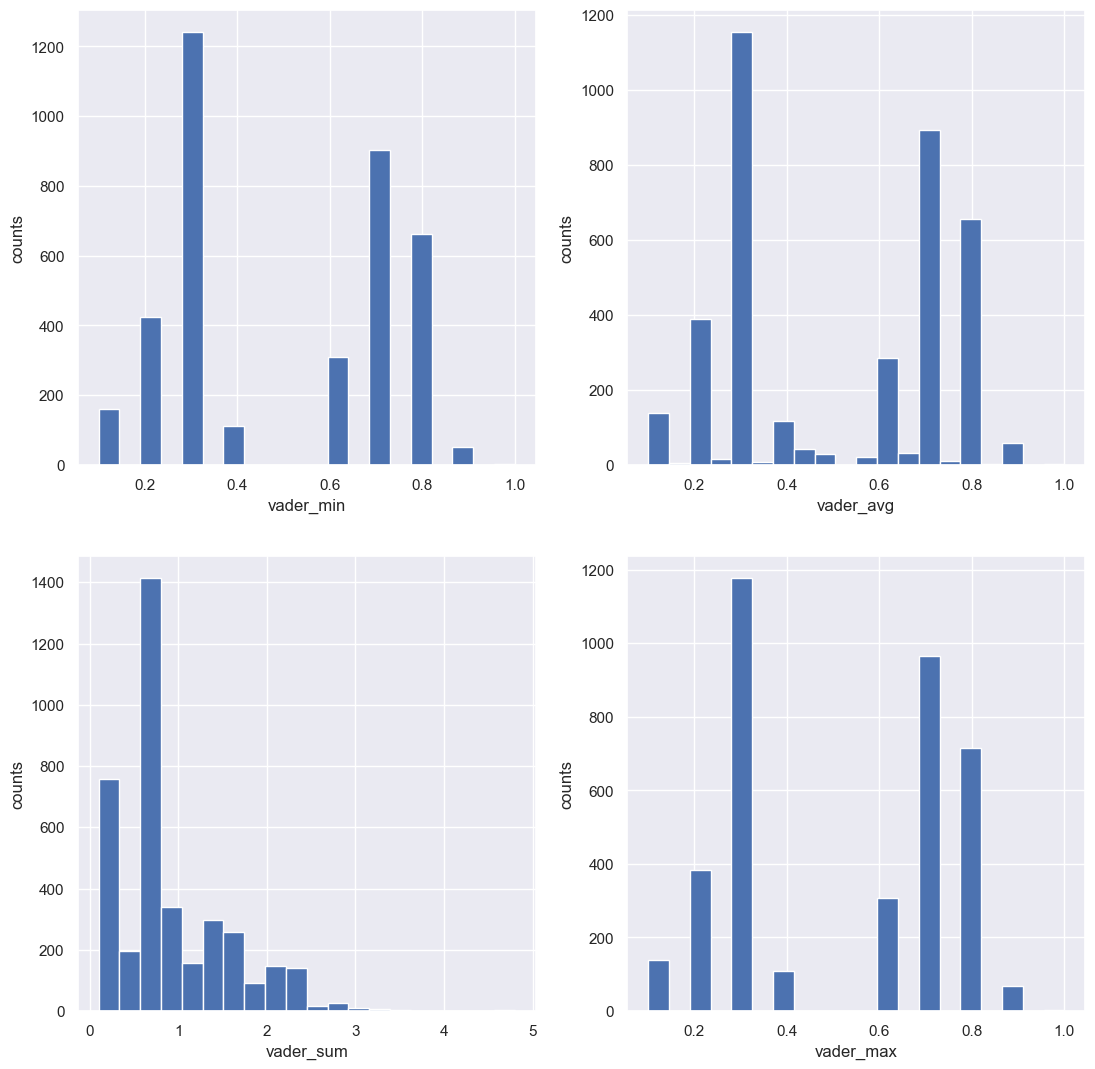

In [34]:
# Vader values histograms

fig = plt.figure(figsize = (13, 13))

plt.title('Sentiment Values')

plt.subplot(221)
plt.hist(sent_df['vader_min'], bins = 20)  
plt.xlabel('vader_min')
plt.ylabel('counts')


plt.subplot(222)
plt.hist(sent_df['vader_avg'], bins = 20)  
plt.xlabel('vader_avg')
plt.ylabel('counts')

plt.subplot(223)
plt.hist(sent_df['vader_sum'], bins = 20)  
plt.xlabel('vader_sum')
plt.ylabel('counts')

plt.subplot(224)
plt.hist(sent_df['vader_max'], bins = 20)  
plt.xlabel('vader_max')
plt.ylabel('counts');



#plt.show()

# User_Track_Time_Hashtag

In [14]:
utht_df.head(20)

user_id                          track_id     hashtag  \
0     81496937  cd52b3e5b51da29e5893dba82a418a4b  nowplaying   
1     81496937  cd52b3e5b51da29e5893dba82a418a4b        goth   
2     81496937  cd52b3e5b51da29e5893dba82a418a4b   deathrock   
3     81496937  cd52b3e5b51da29e5893dba82a418a4b    postpunk   
4   2205686924  da3110a77b724072b08f231c9d6f7534  NowPlaying   
5   2205686924  da3110a77b724072b08f231c9d6f7534         80s   
6   2205686924  da3110a77b724072b08f231c9d6f7534       Retro   
7   2205686924  da3110a77b724072b08f231c9d6f7534         Fun   
8    132588395  ba84d88c10fb0e42d4754a27ead10546  nowplaying   
9     97675221  33f95122281f76e7134f9cbea3be980f  nowplaying   
10    97675221  33f95122281f76e7134f9cbea3be980f  listenlive   
11    17945688  b5c42e81e15cd54b9b0ee34711dedf05  nowplaying   
12    17945688  b5c42e81e15cd54b9b0ee34711dedf05  listenlive   
13   452285741  8bd5206b84c968eda0af8bc86d6ab1d1  nowplaying   
14   452285741  8bd5206b84c968eda0af8bc86d6ab1d1  listenlive   
15    65086276  23ced06ca57d37fa749b1595bc7ed1a4  nowplaying   
16    65086276  23ced06ca57d37fa749b1595bc7ed1a4  listenlive   
17   585098987  6b2590cf3b9cd3386cd4ba4b012eaf3b  nowplaying   
18   442477849  fda40c07a07a15648760431850efc3d8  nowplaying   
19   442477849  fda40c07a07a15648760431850efc3d8  listenlive   

             created_at  
0   2014-01-01 05:54:21  
1   2014-01-01 05:54:21  
2   2014-01-01 05:54:21  
3   2014-01-01 05:54:21  
4   2014-01-01 05:54:22  
5   2014-01-01 05:54:22  
6   2014-01-01 05:54:22  
7   2014-01-01 05:54:22  
8   2014-01-01 05:54:22  
9   2014-01-01 05:54:24  
10  2014-01-01 05:54:24  
11  2014-01-01 05:54:24  
12  2014-01-01 05:54:24  
13  2014-01-01 05:54:25  
14  2014-01-01 05:54:25  
15  2014-01-01 05:54:28  
16  2014-01-01 05:54:28  
17  2014-01-01 05:54:31  
18  2014-01-01 05:54:32  
19  2014-01-01 05:54:32

In [36]:
utht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560113 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   track_id    object
 2   hashtag     object
 3   created_at  object
dtypes: int64(1), object(3)
memory usage: 535.9+ MB


In [37]:
utht_df.describe().T

count          mean           std    min          25%  \
user_id  17560113.0  8.857594e+08  8.578935e+08  939.0  163605478.0   

                 50%           75%           max  
user_id  531451640.0  1.480383e+09  2.937225e+09

In [38]:
utht_df.describe(include=[object]).T

count   unique                               top     freq
track_id    17560113   344536  e24deb4963769d25e2c03ad9bf58a028    82551
hashtag     17560112    49912                        nowplaying  5765350
created_at  17560113  8743896               2014-07-13 11:18:52       70

In [39]:
utht_isna = utht_df.isna().sum().sort_values(ascending=False)/len(utht_df)
print('col_count:',utht_isna.count())

df_data = pd.DataFrame([utht_isna])
df_data.T[0:]

col_count: 4


0
hashtag     5.694724e-08
user_id     0.000000e+00
track_id    0.000000e+00
created_at  0.000000e+00

In [40]:
utht_df['hashtag'].value_counts().to_frame()   

hashtag
nowplaying             5765350
NowPlaying             4954325
listenlive             2740670
nowPlaying              156403
Nowplaying              124702
...                        ...
4añossinCerati               1
EstaEsMúsicaNoMamadas        1
jodidos                      1
FreshAndNews                 1
criminallyunderrated         1

[49912 rows x 1 columns]

# Dataset (Spotify)

In [5]:
#creating a dataframe from the CSV regarding information from Spotify
tracks_df = pd.read_csv('dataset.csv')
tracks_df.head()
print('tracks_df shape:', tracks_df.shape) 

tracks_df shape: (114000, 21)


In [13]:
tracks_df.head(20)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   
16          16  6xKeQgzfjixSUld14qUezm                  Andrew Foy;Renee Foy   
17          17  4Yo0igmcoNyat1secaH0OD                  Andrew Foy;Renee Foy   
18          18  2qLMf6TuEC3ruGJg4SMMN6             Jason Mraz;Colbie Caillat   
19          19  6CgNoAbFJ4Q4Id4EjtbXlC               Boyce Avenue;Bea Miller   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   
15                                  The Boy Who Never   
16                              ily (i love you baby)   
17                                        At My Worst   
18                We Sing. We Dance. We Steal Things.   
19                             Cover Sessions, Vol. 4   

                          track_name  popularity  duration_ms  explicit  \
0                             Comedy          73       230666     False   
1                   Ghost - Acoustic          55       149610     False   
2                     To Begin Again          57       210826     False   
3         Can't Help Falling In Love          71       201933     False   
4                            Hold On          82       198853     False   
5               Days I Will Remember          58       214240     False   
6                      Say Something          74       229400     False   
7                          I'm Yours          80       242946     False   
8                              Lucky          74       189613     False   
9                             Hunger          56       205594     False   
10              Give Me Your Forever          74       244800     False   
11                   I Won't Give Up          69       240165     False   
12                              Solo          52       198712     False   
13                          Bad Liar          62       248448     False   


In [42]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
tracks_df.describe().T

count           mean            std     min  \
Unnamed: 0        114000.0   56999.500000   32909.109681   0.000   
popularity        114000.0      33.238535      22.305078   0.000   
duration_ms       114000.0  228029.153114  107297.712645   0.000   
danceability      114000.0       0.566800       0.173542   0.000   
energy            114000.0       0.641383       0.251529   0.000   
key               114000.0       5.309140       3.559987   0.000   
loudness          114000.0      -8.258960       5.029337 -49.531   
mode              114000.0       0.637553       0.480709   0.000   
speechiness       114000.0       0.084652       0.105732   0.000   
acousticness      114000.0       0.314910       0.332523   0.000   
instrumentalness  114000.0       0.156050       0.309555   0.000   
liveness          114000.0       0.213553       0.190378   0.000   
valence           114000.0       0.474068       0.259261   0.000   
tempo             114000.0     122.147837      29.978197   0.000   
time_signature    114000.0       3.904035       0.432621   0.000   

                           25%            50%          75%          max  
Unnamed: 0         28499.75000   56999.500000   85499.2500   113999.000  
popularity            17.00000      35.000000      50.0000      100.000  
duration_ms       174066.00000  212906.000000  261506.0000  5237295.000  
danceability           0.45600       0.580000       0.6950        0.985  
energy                 0.47200       0.685000       0.8540        1.000  
key                    2.00000       5.000000       8.0000       11.000  
loudness             -10.01300      -7.004000      -5.0030        4.532  
mode                   0.00000       1.000000       1.0000        1.000  
speechiness            0.03590       0.048900       0.0845        0.965  
acousticness           0.01690       0.169000       0.5980        0.996  
instrumentalness       0.00000       0.000042       0.0490        1.000  
liveness               0.09800       0.132000       0.2730        1.000  
valence                0.26000       0.464000       0.6830        0.995  
tempo                 99.21875     122.017000     140.0710      243.372  
time_signature         4.00000       4.000000       4.0000        5.000

In [44]:
tracks_df.describe(include=[object])

track_id      artists                  album_name  \
count                   114000       113999                      113999   
unique                   89741        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      114000  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000

In [45]:
# NaN values

tracks_isna = tracks_df.isna().sum().sort_values(ascending=False)/len(tracks_df)
print('col_count:',tracks_isna.count())

df_data = pd.DataFrame([tracks_isna])
df_data.T[0:]

col_count: 21


0
artists           0.000009
album_name        0.000009
track_name        0.000009
Unnamed: 0        0.000000
mode              0.000000
time_signature    0.000000
tempo             0.000000
valence           0.000000
liveness          0.000000
instrumentalness  0.000000
acousticness      0.000000
speechiness       0.000000
key               0.000000
loudness          0.000000
track_id          0.000000
energy            0.000000
danceability      0.000000
explicit          0.000000
duration_ms       0.000000
popularity        0.000000
track_genre       0.000000

# Drop useles columns

In [46]:
tracks_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [47]:
# Different data grouping

tracks_df.groupby(['artists', 'album_name']).agg('track_name').value_counts(ascending = False).to_frame().head(50)




#cont_df.groupby(['time_zone', 'lang', 'tweet_lang']).agg('count').head(50)

track_name
artists                                            album_name                               track_name                                                    
!nvite                                             pagadoff                                 pagadoff                                                     1
                                                   strolling                                strolling                                                    1
"Puppy Dog Pals" Cast                              Puppy Dog Pals: Disney Junior Music      Going on a Mission                                           1
                                                                                            Puppy Dog Pals Main Title Theme                              1
"Weird Al" Yankovic                                "Weird Al" Yankovic                      Gotta Boogie                                                 1
                                                                                            I'll Be Mellow When I'm Dead                                 1
                                                                                            Such a Groovy Guy                                            1
                                                                                            The Check's In the Mail                                      1
                                                   Bad Hair Day                             Amish Paradise (Parody of "Gangsta's Paradise" ...           1
                                                   In 3-D                                   King of Suede                                                1
                                                   Polka Party                              Good Enough for Now                                          1
                                                   Poodle Hat                               Genius In France                                             1
                                                   Running With Scissors                    Grapefruit Diet (Parody of "Zoot Suit Riot" by ...           1
                                                   The Essential "Weird Al" Yankovic        Gump (Parody of "Lump" by The Presidents of the...           1
                                                                                            Since You've Been Gone                                       1
                                                                                            The Biggest Ball of Twine In Minnesota                       1
                                                                                            The Night Santa Went Crazy                                   1
                                                                                            Trapped In the Drive-Thru (Parody of "Trapped I...           1
                                                   UHF: "Weird Al" Yankovic                 Spatula City                                                 1
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs Nursery Rhymes For Young Kids            Wheels on The Bus Go Round and Round (Instrumen...           1
$affie                                             summertime                               summertime                                                   1
$affie;lofi stu                                    Tendenzies                               Tendenzies                                                   1
&ME;Rampa;Adam Port;Sofie Royer                    Discoteca                                Discoteca                                                    1
'Falsettos' 2016 Broadway Company                  Falsettos (2016 Broadway Cast Recording) Jason's Bar Mitzvah                                          1
'Til Tuesday                                       Coming Up Close: A Retrospective         Voices Carry - Single 

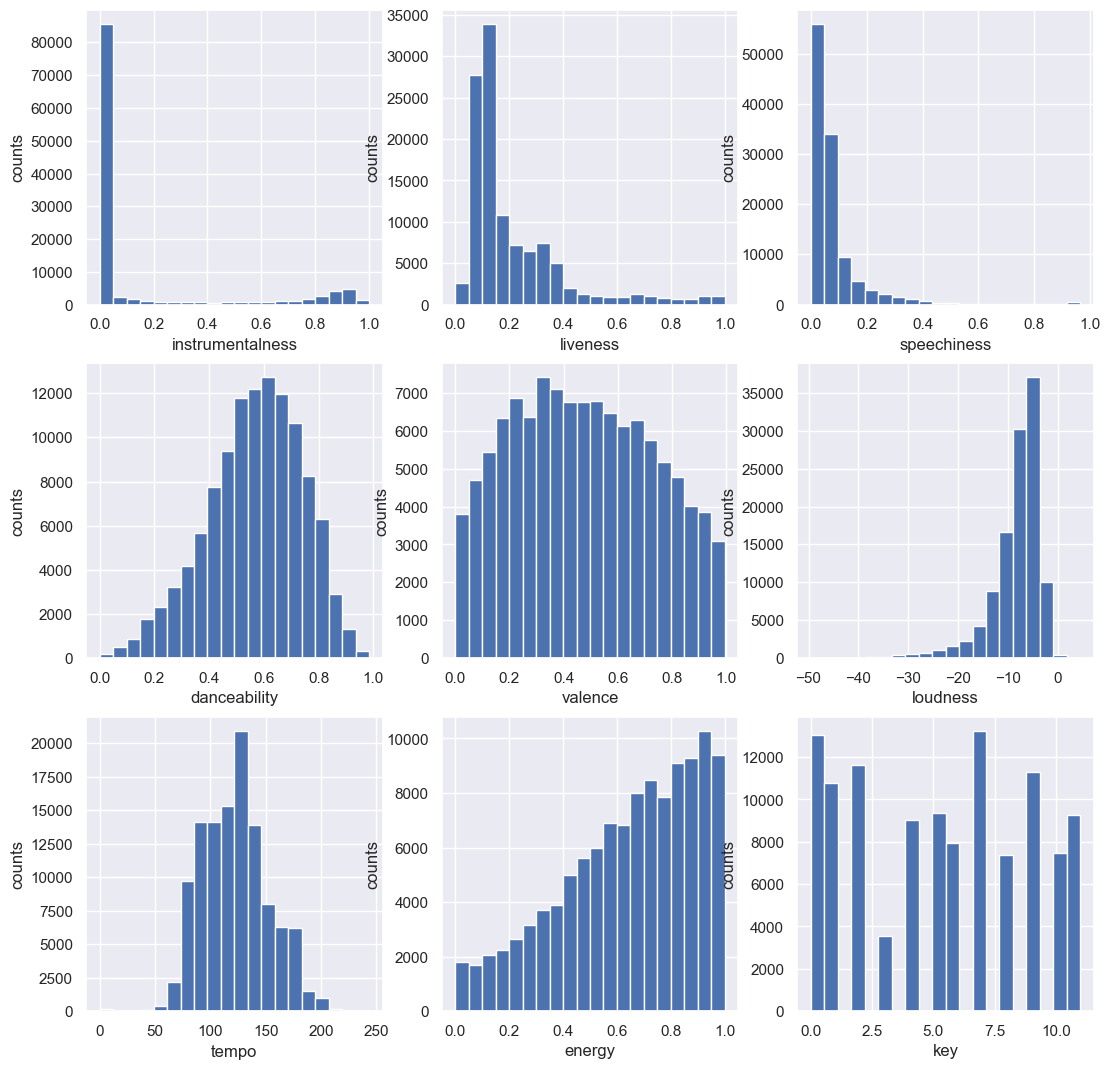

In [48]:
# Features histogram

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

plt.subplot(331)
plt.hist(tracks_df['instrumentalness'], bins = 20)  
plt.xlabel('instrumentalness')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(tracks_df['liveness'], bins = 20)  
plt.xlabel('liveness')
plt.ylabel('counts')

plt.subplot(333)
plt.hist(tracks_df['speechiness'], bins = 20)  
plt.xlabel('speechiness')
plt.ylabel('counts')

plt.subplot(334)
plt.hist(tracks_df['danceability'], bins = 20)  
plt.xlabel('danceability')
plt.ylabel('counts')

plt.subplot(335)
plt.hist(tracks_df['valence'], bins = 20)  
plt.xlabel('valence')
plt.ylabel('counts')

plt.subplot(336)
plt.hist(tracks_df['loudness'], bins = 20)  
plt.xlabel('loudness')
plt.ylabel('counts')

plt.subplot(337)
plt.hist(tracks_df['tempo'], bins = 20)  
plt.xlabel('tempo')
plt.ylabel('counts')


plt.subplot(338)
plt.hist(tracks_df['energy'], bins = 20)  
plt.xlabel('energy')
plt.ylabel('counts')

plt.subplot(339)
plt.hist(tracks_df['key'], bins = 20)  
plt.xlabel('key')
plt.ylabel('counts');
#plt.show()

Text(0, 0.5, 'counts')

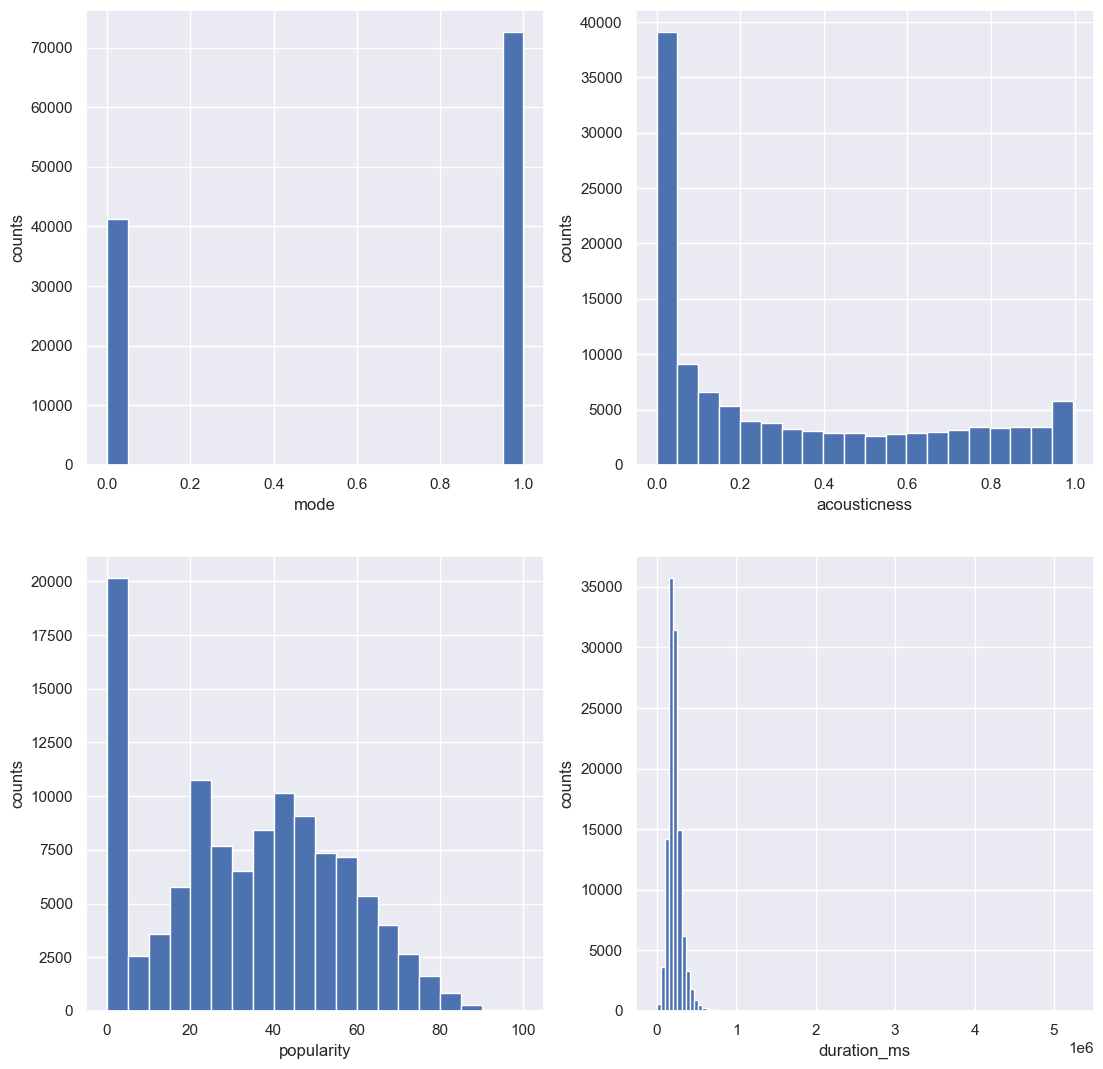

In [49]:
# more features histogram

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

plt.subplot(221)
plt.hist(tracks_df['mode'], bins = 20)  
plt.xlabel('mode')
plt.ylabel('counts')

plt.subplot(222)
plt.hist(tracks_df['acousticness'], bins = 20)  
plt.xlabel('acousticness')
plt.ylabel('counts')

plt.subplot(223)
plt.hist(tracks_df['popularity'], bins = 20)  
plt.xlabel('popularity')
plt.ylabel('counts')


plt.subplot(224)
plt.hist(tracks_df['duration_ms'], bins = 100)  
plt.xlabel('duration_ms')
plt.ylabel('counts')

# Datasets Duplicated Values

In [50]:
# cont_df, sent_df, utht_df, tracks_df

cont_df.duplicated().sum()  #61

60

In [51]:
sent_df.duplicated().sum()

0

In [52]:
utht_df.duplicated().sum()   #35530

35530

In [53]:
tracks_df.duplicated().sum()  #450

450

# Drop Duplicates

In [54]:
cont_df.drop_duplicates()
utht_df.drop_duplicates()
tracks_df.drop_duplicates()

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

# Datesets Heatmaps

Showing the relationship between the variables of each dataframe where relevant to gain an understanding of correlation between them.

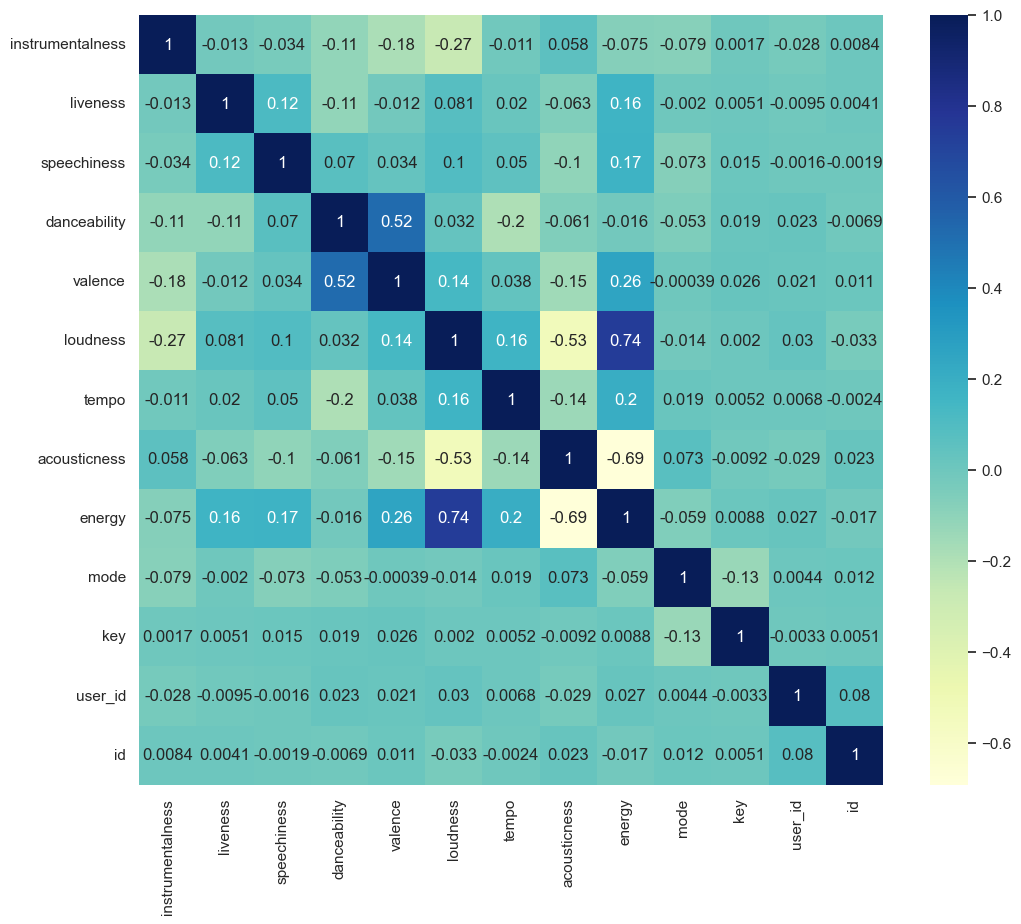

In [55]:
plt.figure(figsize=(12, 10))
cont_plot = sns.heatmap(cont_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of cont_df</i></center>

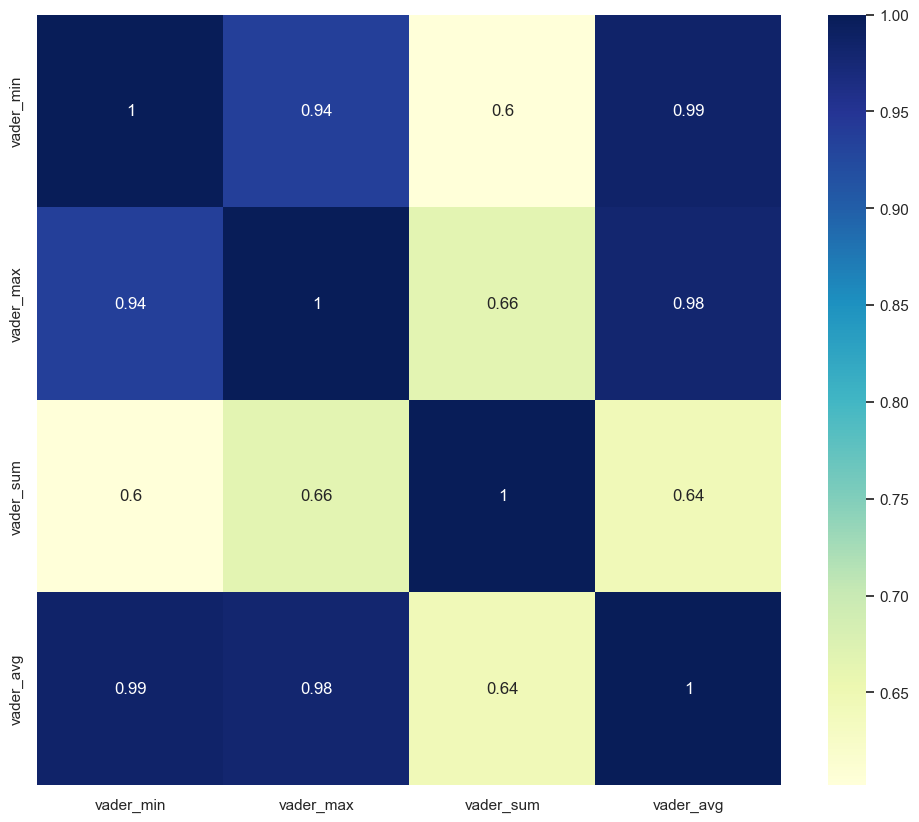

In [56]:
plt.figure(figsize=(12, 10))
sent_plot = sns.heatmap(sent_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of sent_df</i></center>

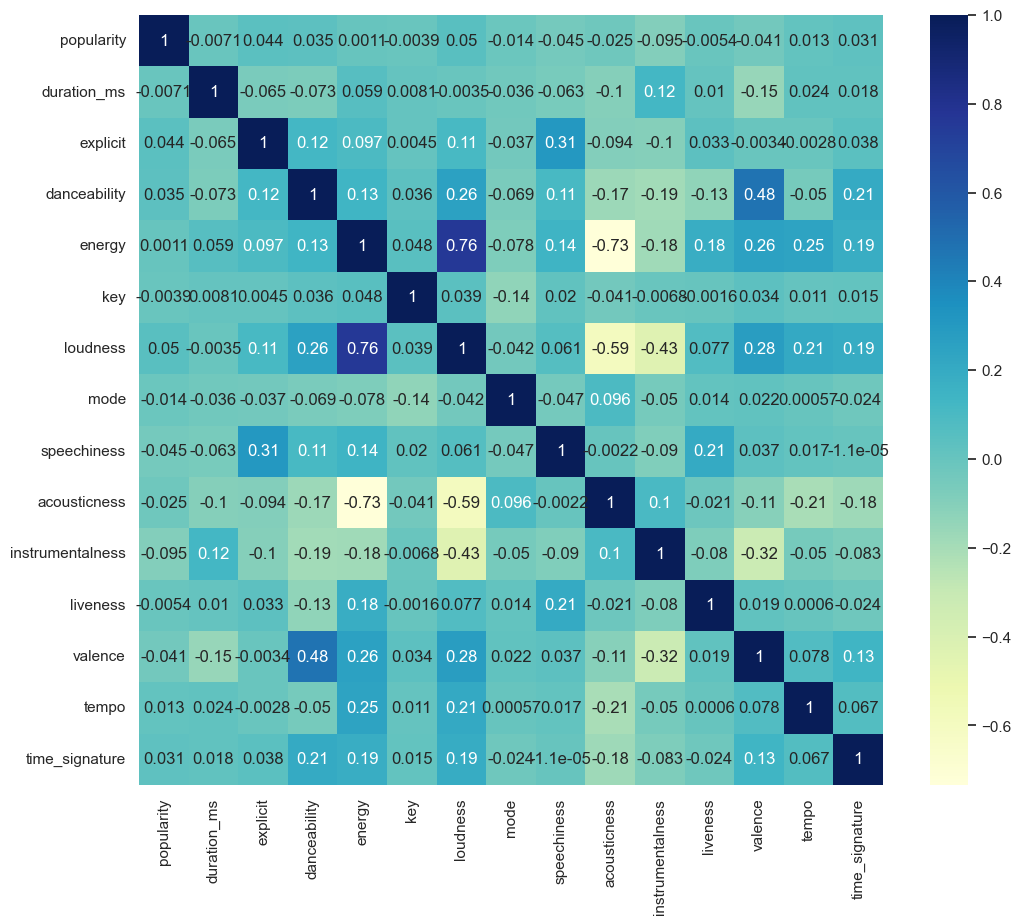

In [57]:
plt.figure(figsize=(12, 10))
tracks_plot = sns.heatmap(tracks_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of cont_df</i></center>

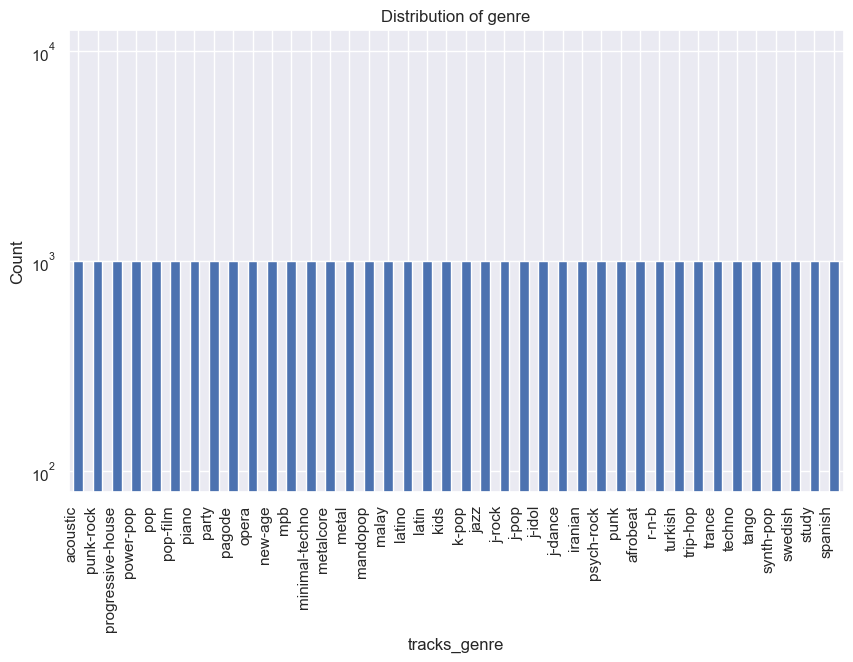

In [58]:
# Track Genres

track_genre_counts= tracks_df['track_genre'].value_counts()
plt.figure(figsize=(10,6))
top_genre= track_genre_counts.nlargest(40)
top_genre.plot(kind='bar')
plt.yscale('log')
plt.title('Distribution of genre')
plt.xlabel('tracks_genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show();

In [59]:
names = tracks_df["track_genre"].value_counts(dropna=False).keys().tolist()
counts = tracks_df["track_genre"].value_counts(dropna=False).tolist()

results = []

for name, count in zip(names, counts):
    results.append({"name": name, "count": count})

results
#114 genre

[{'name': 'acoustic', 'count': 1000},
 {'name': 'punk-rock', 'count': 1000},
 {'name': 'progressive-house', 'count': 1000},
 {'name': 'power-pop', 'count': 1000},
 {'name': 'pop', 'count': 1000},
 {'name': 'pop-film', 'count': 1000},
 {'name': 'piano', 'count': 1000},
 {'name': 'party', 'count': 1000},
 {'name': 'pagode', 'count': 1000},
 {'name': 'opera', 'count': 1000},
 {'name': 'new-age', 'count': 1000},
 {'name': 'mpb', 'count': 1000},
 {'name': 'minimal-techno', 'count': 1000},
 {'name': 'metalcore', 'count': 1000},
 {'name': 'metal', 'count': 1000},
 {'name': 'mandopop', 'count': 1000},
 {'name': 'malay', 'count': 1000},
 {'name': 'latino', 'count': 1000},
 {'name': 'latin', 'count': 1000},
 {'name': 'kids', 'count': 1000},
 {'name': 'k-pop', 'count': 1000},
 {'name': 'jazz', 'count': 1000},
 {'name': 'j-rock', 'count': 1000},
 {'name': 'j-pop', 'count': 1000},
 {'name': 'j-idol', 'count': 1000},
 {'name': 'j-dance', 'count': 1000},
 {'name': 'iranian', 'count': 1000},
 {'name':

As can be seen, the data is balanced with 1000 entries for each genre.

In [60]:
# Artist names 


artist_name = tracks_df["artists"].value_counts(dropna=False).keys().tolist()
artist_count = tracks_df["artists"].value_counts(dropna=False).tolist()
value_dict = dict(zip(artist_name, artist_count))
value_dict

{'The Beatles': 279,
 'George Jones': 271,
 'Stevie Wonder': 236,
 'Linkin Park': 224,
 'Ella Fitzgerald': 222,
 'Prateek Kuhad': 217,
 'Feid': 202,
 'Chuck Berry': 190,
 'Håkan Hellström': 183,
 'OneRepublic': 181,
 'The Beach Boys': 176,
 'my little airport': 171,
 'Elvis Presley': 169,
 'Charlie Brown Jr.': 169,
 'Red Hot Chili Peppers': 159,
 'Bryan Adams': 157,
 'Scooter': 155,
 'Daddy Yankee': 154,
 'Arctic Monkeys': 152,
 'BTS': 151,
 'Norah Jones': 150,
 'The Prophet': 145,
 'Hank Williams': 140,
 'Glee Cast': 139,
 'Don Omar': 137,
 'Vybz Kartel': 128,
 'Los Prisioneros': 126,
 'CoComelon': 122,
 'Anupam Roy': 121,
 'Seiko Matsuda': 118,
 'Burna Boy': 116,
 'Weezer': 111,
 'Dean Martin': 110,
 'Rob Zombie': 106,
 'Germaine Franco': 106,
 'Marilyn Manson': 105,
 'Hank Williams;Drifting Cowboys': 105,
 'J Balvin': 104,
 'Eikichi Yazawa': 103,
 'Nat King Cole': 102,
 'Eason Chan': 101,
 'Almafuerte': 99,
 'Little Symphony': 94,
 'Lamb of God': 94,
 'Maneva': 94,
 'Jay Chou': 93,


The distribution of artists is not balanced; as can be seen, The Beatles have the most number of tracks (279) while other artists may have much less.

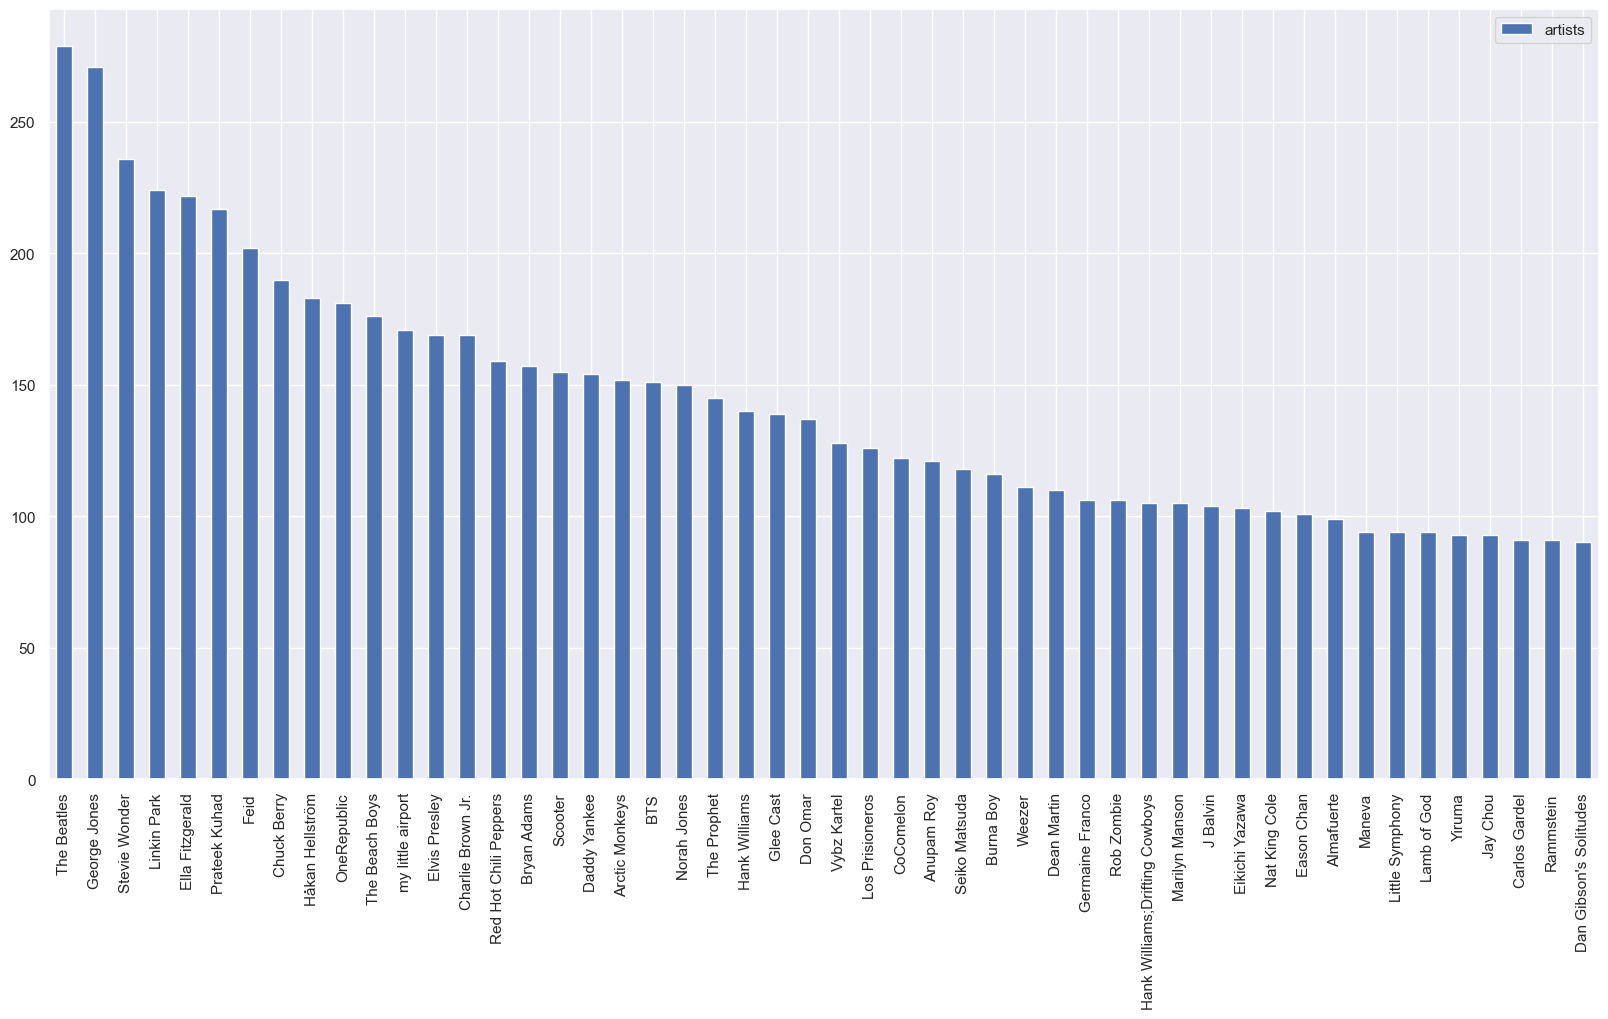

In [61]:
# Most relevant Artists

pd.DataFrame(tracks_df["artists"].value_counts().nlargest(50)).plot(kind = 'bar', figsize=(20,10));

#tracks_df["artists"].value_counts()[tracks_df["artists"].value_counts() > 10].plot(kind = 'bar', figsize=(20,10));

In [62]:
album_name = tracks_df["album_name"].value_counts(dropna=False).keys().tolist()
album_count = tracks_df["album_name"].value_counts(dropna=False).tolist()
album = []

for name, count in zip(album_name, album_count):
    album.append({"artist": album_name, "count": album_count})

album[:100]
#46589 albums

[{'artist': ['Alternative Christmas 2022',
   'Feliz Cumpleaños con Perreo',
   'Metal',
   'Halloween con perreito',
   'Halloween Party 2022',
   'The Complete Hank Williams',
   'Fiesta portatil',
   'Frescura y Perreo',
   'Esto me suena a Farra',
   'Perreo en Halloween',
   "On air 70's Hits",
   'Queda poco para la PAES 2.0',
   'Reggeaton Imperdible',
   'Halloween Metal Nights',
   'Homecoming Latin Party',
   'El perreo es el futuro',
   'Arbeitsmusik Herbst/Winter 2022/2023',
   'Greatest Hits',
   'Hans Zimmer: Epic Scores',
   'EDM Gaming Music Autumn/Winter 2022',
   'Christmas Songs 2022',
   'Reggaeton Mix Perreito',
   'Classical Christmas',
   'Clásicos de ahora: Perreo',
   "World's Best Christmas Playlist",
   'Mozart: A Night of Classics',
   'Mozart - All Day Classics',
   'Best 70s Rock Tunes',
   'Night Drive Autumn/Winter 2022/23',
   'Perreo Tenebroso Vol. 2',
   'Best Of Karneval',
   'All I Want For Christmas Is You',
   'Rock & Halloween',
   'Bájale como 7

In [ ]:
pd.DataFrame(tracks_df["album_name"].value_counts().nlargest(100)).plot(kind = 'bar', figsize=(20,10));

In [ ]:
tracks_df["album_name"].nunique()

There are 46,589 different instances of album names in the dataset.